In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
num_classs=3
image_size=128
batch_size_training=20
batch_size_validation=20
data_generator=ImageDataGenerator(preprocessing_function = preprocess_input)

In [16]:
# training data
train_generator=data_generator.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks1/AI class/small_dataset/train" ,
   target_size=(image_size,image_size),
   batch_size=batch_size_training,
   class_mode="categorical"
)

# validation data
valid_generator=data_generator.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks1/AI class/small_dataset/validation" ,
   target_size=(image_size,image_size),
   batch_size=batch_size_validation,
   class_mode="categorical"
)

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [17]:
# VGG16模型架構
model16 = VGG16(weights='imagenet',pooling='avg',include_top=False)
model16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Transfer learing

In [18]:
model = Sequential()
model.add(VGG16(weights='imagenet',pooling='avg',include_top=False,)) # 只利用VGG16萃取特徵，因此不包含最後的全連接層
model.add(Dense(num_classs, activation='softmax')) #加上分3類的全連接層
model.layers[0].trainable = False #將features層凍住，只訓練最後的全連接層
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
# model parameter
model.compile(optimizer='adam',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

steps_per_epoch_train=len(train_generator)
steps_per_epoch_val= len(valid_generator)
number_epochs=20

In [20]:
#fit model
fit_history = model.fit_generator(train_generator,
                  steps_per_epoch=steps_per_epoch_train,
                  epochs = number_epochs,
                  validation_data = valid_generator,
                  validation_steps = steps_per_epoch_val,
                  verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
150/150 [==============================] - 933s 6s/step - loss: 1.2242 - accuracy: 0.7337 - val_loss: 0.2883 - val_accuracy: 0.9053
Epoch 2/20
150/150 [==============================] - 12s 77ms/step - loss: 0.2122 - accuracy: 0.9367 - val_loss: 0.1737 - val_accuracy: 0.9480
Epoch 3/20
150/150 [==============================] - 13s 89ms/step - loss: 0.1151 - accuracy: 0.9667 - val_loss: 0.1153 - val_accuracy: 0.9687
Epoch 4/20
150/150 [==============================] - 13s 90ms/step - loss: 0.0770 - accuracy: 0.9787 - val_loss: 0.0944 - val_accuracy: 0.9740
Epoch 5/20
150/150 [==============================] - 13s 85ms/step - loss: 0.0542 - accuracy: 0.9840 - val_loss: 0.0855 - val_accuracy: 0.9773
Epoch 6/20
150/150 [==============================] - 13s 87ms/step - loss: 0.0380 - accuracy: 0.9897 - val_loss: 0.0787 - val_accuracy: 0.9793
Epoch 7/20
150/150 [==============================] - 13s 86ms/step - loss: 0.0298 - accuracy: 0.9933 - val_loss: 0.0760 - val_accuracy: 

In [ ]:
model.save('/content/drive/MyDrive/VGG_model.h5') #saved trained model

In [4]:
from keras.models import load_model

vgg16_saved = load_model('/content/drive/MyDrive/VGG_model.h5') #load trained model
vgg16_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
# Testing data
test_gen=data_generator.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks1/AI class/small_dataset/test" ,
   target_size=(image_size,image_size),
   shuffle=False
)
steps_per_epoch_test = len(test_gen)

Found 1500 images belonging to 3 classes.


In [11]:
# Testing data準確度
test_history = vgg16_saved.evaluate_generator(test_gen,steps_per_epoch_test,verbose=1)
print('the accuracy for testing is ',test_history[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


47/47 [==============================] - 285s 6s/step - loss: 0.2981 - accuracy: 0.9673
the accuracy for testing is  0.9673333168029785


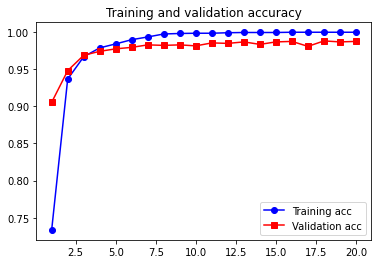

In [22]:
#plot the accuracy 
import matplotlib.pyplot as plt

train_accuracy = fit_history.history['accuracy']
val_accuracy = fit_history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo-', label='Training acc')
plt.plot(epochs, val_accuracy, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

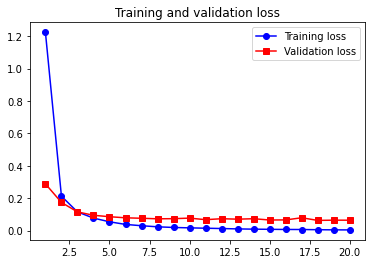

In [24]:
#plot the loss 

train_loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']

plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
predict = vgg16_saved.predict(test_gen).argmax(axis = 1) #模型預測值
true_classes = test_gen.classes #真實值
print('true classes=',true_classes)
print('predict classes=',predict)

class_labels = list(test_gen.class_indices.keys()) 
class_labels

true classes= [0 0 0 ... 2 2 2]
predict classes= [0 0 0 ... 2 2 2]


['incorrect', 'with_mask', 'without_mask']

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[499   4   4]
 [ 25 466   6]
 [  2   8 486]]


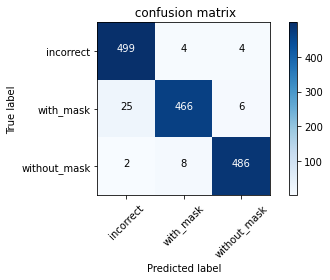

In [27]:
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

cnf_matrix = confusion_matrix(true_classes, predict) #confusion_matrix
plot_confusion_matrix(cnf_matrix, classes=class_labels,normalize=False,title=' confusion matrix')
plt.show()

### 在圖片上標記模型預測結果

In [28]:
test_gen_1=data_generator.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks1/AI class/test11" ,
   target_size=(image_size,image_size),
   shuffle=False)

steps_per_epoch_test= len(test_gen_1)
predict = vgg16_saved.predict_generator(test_gen_1) #模型預測

Found 8 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


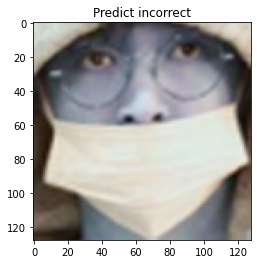

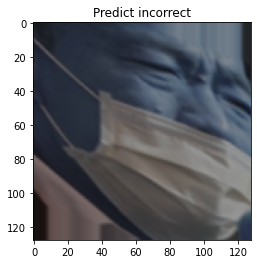

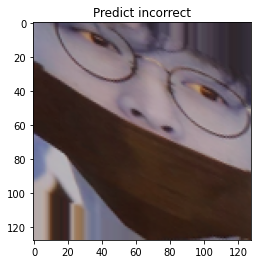

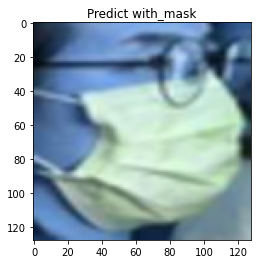

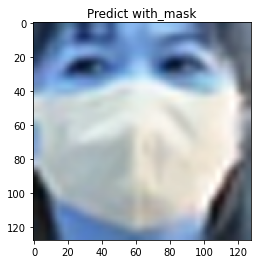

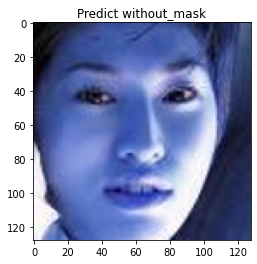

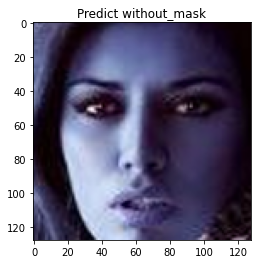

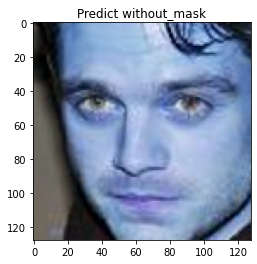

In [29]:
from imutils import paths
import cv2
import numpy as np 

path='/content/drive/My Drive/Colab Notebooks1/AI class/test11' 
imagePaths = sorted(list(paths.list_images(path))) #排序資料夾中的檔案

i=0
for imagePath in imagePaths: #依序讀取資料夾中的每個檔案
    image_ori = cv2.imread(imagePath)
    plt.imshow(image_ori) #顯示每張圖片
    r = np.argmax(predict[i]) #預測結果是0,1,2，選機率最大的
    label=['incorrect','with_mask','without_mask']
    plt.title('Predict '+ label[r]) #將每張圖片標題加上label
    i+=1
    plt.show()